In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('assumption_data.csv')

In [3]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [4]:
df.shape

(8523, 46)

In [5]:
x = df.drop('Item_Outlet_Sales', axis=1)
y = df.Item_Outlet_Sales

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 3)

In [7]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

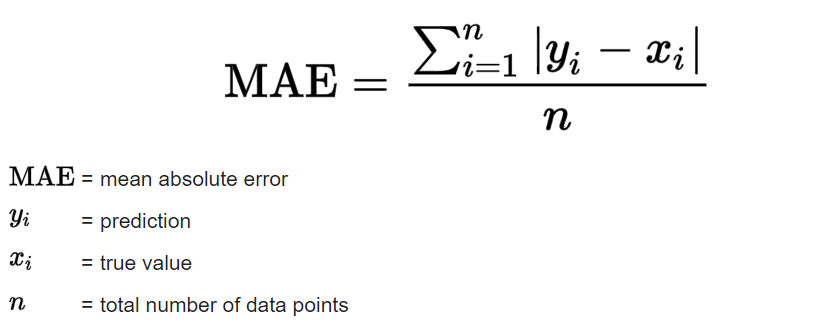

In [8]:
pred_train = lr.predict(x_train)
print('Training MAE:',mean_absolute_error(pred_train,y_train))

Training MAE: 841.8957768992409


In [9]:
pred_test = lr.predict(x_test)
print('Testing MAE:',mean_absolute_error(pred_test,y_test))

Testing MAE: 818.4567159298724


In [10]:
lr.coef_ # there will be one coefficient assigned for each feature we are training on

array([ 1.56048235e+00, -3.19606210e+02,  1.54321166e+01, -1.93919448e+01,
       -3.07151879e+01, -5.03568631e+01,  1.22305909e+01,  1.16212598e+02,
       -4.73711383e+01, -2.56172020e+01,  4.61556172e+00, -5.18816093e+01,
       -3.87691735e+01, -2.36633395e+01, -6.04440676e+01,  3.88486853e+01,
       -4.22224025e+01, -6.77743021e+00, -2.83202622e+01, -1.35794371e+01,
        1.67728194e+01,  2.47018640e+02, -2.93075706e+01,  8.83907870e+00,
        4.48770918e+00, -4.90223904e+02, -4.90202802e+01,  1.46232413e+02,
       -3.42016367e+01, -4.68518400e+02,  5.96583086e+02,  1.58407353e+02,
       -1.01931893e+02,  3.09518810e+02, -6.68455490e+01, -4.90202802e+01,
        4.95535901e+02, -5.92235978e-01, -2.25845138e+02,  2.02707873e+02,
        2.31372657e+01, -9.58742303e+02,  3.96360854e+02, -3.42016367e+01,
        5.96583086e+02])

In [11]:
lr.intercept_

38380.117855492776

These coefficients' value show how they are impacting the target which is being calculated through line equation `mx+c` where;

m - coefficients, c - intercept

Now, visualizing the impact of each feature on target:

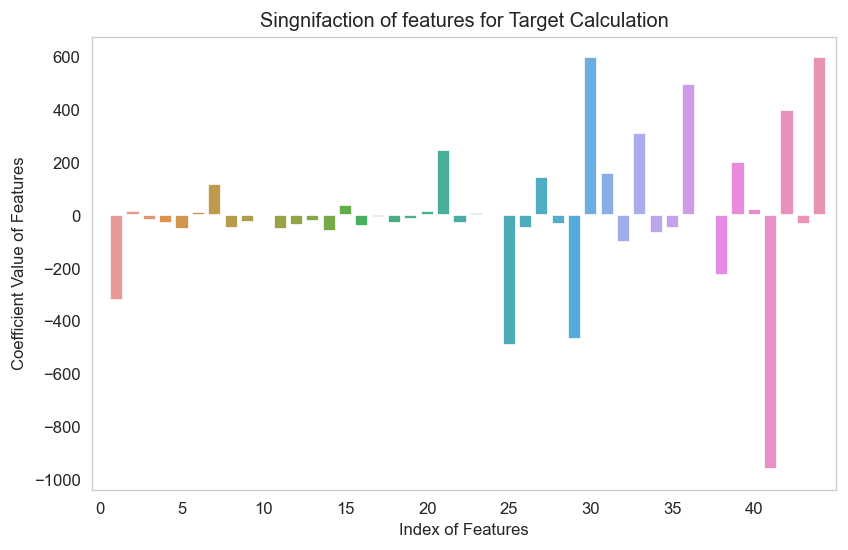

In [12]:
plt.figure(figsize=(8,5),dpi=120)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.barplot(x = [i for i in range(len(lr.coef_))],y = lr.coef_)
plt.xticks(np.arange(len(lr.coef_)+2,step=5))
plt.ylabel('Coefficient Value of Features')
plt.xlabel('Index of Features')
plt.title('Singnifaction of features for Target Calculation')
plt.show()

## 1. Linearity 

`The relationship between X and the mean of Y is linear`

`To check: `Check residual v/s fitted value plot(shown in 2nd assumption) . We can add polynomial terms in our model to capture non-linear effect.

## 2. Homoscedasticity

`The variance of residual is the same for any value of X.`

If the variance of residuals is non-constant. This is called `heteroskedasticity`.

`What exactly are residuals?`  A residual is the vertical distance between a data point and the regression line. Each data point has one residual. They are positive if they are above the regression line and negative if they are below the regression line.

In [13]:
# In this case we will find the residuals by calculating distance between original test data point and predicted data point 
# i.e. the point on regresssion line

In [14]:
residuals = y_test.values-pred_test

In [15]:
# Now these residuals in order to conform to our assumption, the variance of residuals should be should be mostly constant.

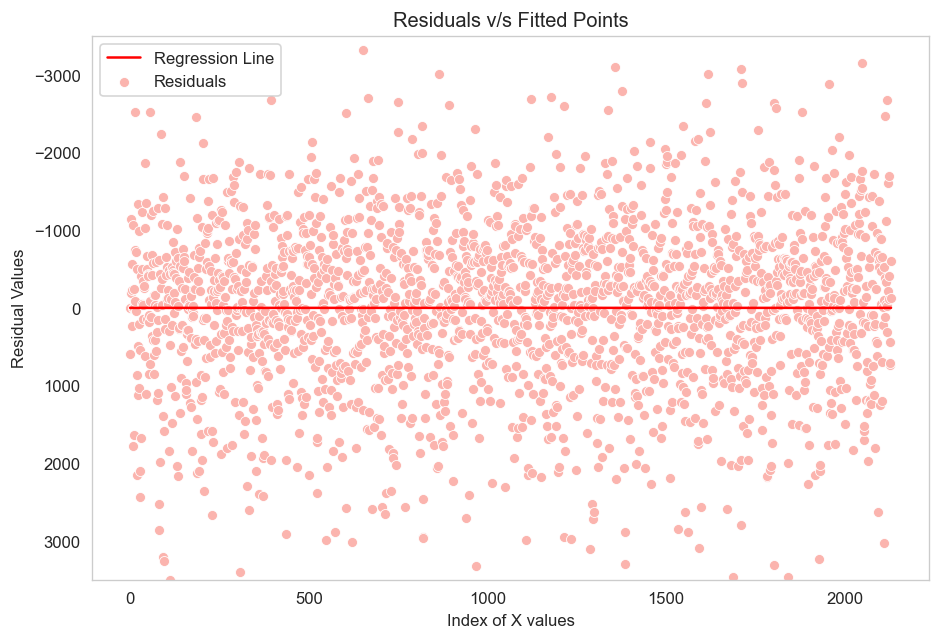

In [16]:
# The regression line will be the residual=0 line
sns.set_palette('Pastel1')
plt.figure(figsize=(9,6),dpi=120)
sns.lineplot(x = np.arange(len(x_test)),y = np.zeros(len(x_test)),color ='red',label='Regression Line')
sns.scatterplot(x = np.arange(len(x_test)),y = residuals,label='Residuals')
plt.ylim(3500,-3500)
plt.xlabel('Index of X values')
plt.ylabel('Residual Values')
plt.title('Residuals v/s Fitted Points')
plt.show()

In [17]:
# This residual plot has constant variance throughout the X values hence it is Homoscedastic.

We can also check `Linearity` of dataset through this plot.

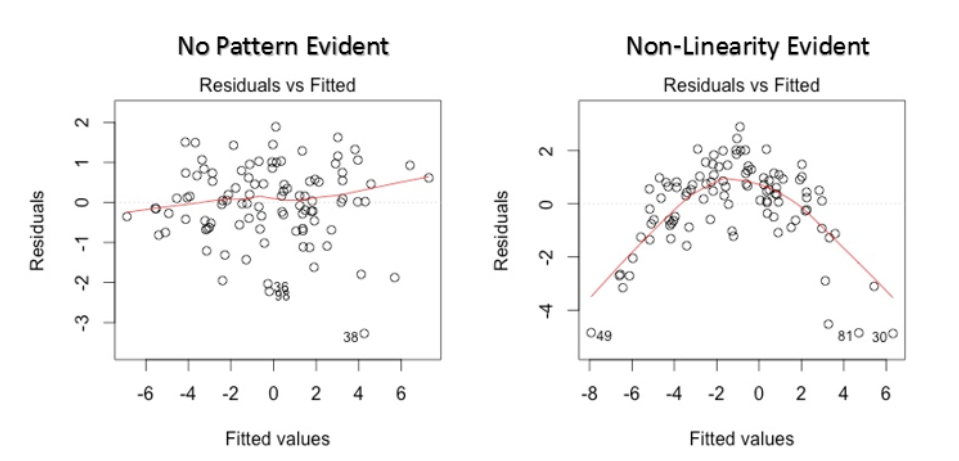

`Source: Analytics Vidhya`


## 3. Normal Distribution of error terms

`Presence of non – normal distribution suggests that there are a few unusual data points which must be studied closely to make a better model.`

`To Check:` Plot histogram or QQ Plot

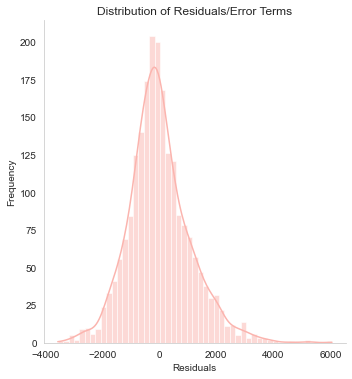

In [18]:
# Plotting histogram
sns.displot(residuals,kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals/Error Terms')
plt.show()

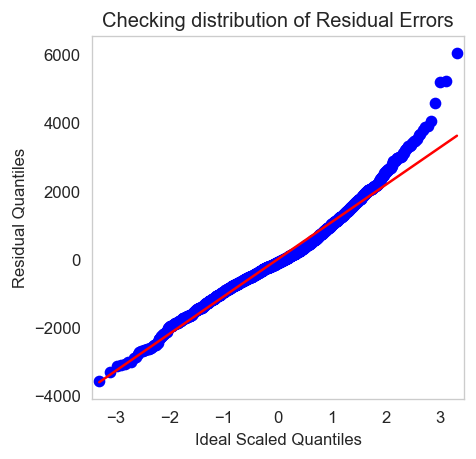

In [19]:
## QQ Plot
import statsmodels.api as sm
fig, ax = plt.subplots(figsize=(4,4) , dpi = 120)
sm.qqplot(residuals, line = 's',ax=ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

In [20]:
# both Histogram and QQ Plot convey the same results i.e., though most of the residuals are normal in nature, some outliers
# are present in them. the outliers are clearly visible in Histogram and the slightly concave shape of figure in the end
# conveys the presence of outliers.

## 4. Independence

`There should not be multi-collinearity i.e., predictor variables should be independent of each other as if there is correlation among the predictors, finding out which variable is actually affecting the target becomes difficult.`

`To check: ` Variance Inflations Factor. In this we choose each feature and apply regression to it against all other features. Higher the VIF, more the correlation

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 




In [22]:
print(pd.DataFrame([variance_inflation_factor(df.values,feature) for feature in range(len(df.columns))],index=df.columns))

                                        0
Item_Weight                      2.349925
Item_Visibility                  1.101456
Item_MRP                         1.753170
Outlet_Establishment_Year             inf
Item_Outlet_Sales                2.292720
Item_Fat_Content_LF                   inf
Item_Fat_Content_Low Fat              inf
Item_Fat_Content_Regular              inf
Item_Fat_Content_low fat              inf
Item_Fat_Content_reg                  inf
Item_Type_Baking Goods                inf
Item_Type_Breads                      inf
Item_Type_Breakfast                   inf
Item_Type_Canned                      inf
Item_Type_Dairy                       inf
Item_Type_Frozen Foods                inf
Item_Type_Fruits and Vegetables       inf
Item_Type_Hard Drinks                 inf
Item_Type_Health and Hygiene          inf
Item_Type_Household                   inf
Item_Type_Meat                        inf
Item_Type_Others                      inf
Item_Type_Seafood                 

A value of 1 means that the predictor is not correlated with other variables. The higher the value, the greater the correlation of the variable with other variables. Values of more than 4 or 5 are sometimes regarded as being moderate to high, with values of 10 or more being regarded as very high. Also, we only see VIF for coninuous variables.


## Building the Final Model

In [23]:
# Now, we would normalize our features.

model = LinearRegression(normalize = True)
model.fit(x_train,y_train)

LinearRegression(normalize=True)

In [24]:
train_pred = model.predict(x_train)
print('Mean Absolute Error of Training dataset: ', mean_absolute_error(train_pred,y_train))

Mean Absolute Error of Training dataset:  848.7582553191489


In [25]:
test_pred = model.predict(x_test)
print('Mean Absolute Error of Training dataset: ', mean_absolute_error(test_pred,y_test))

Mean Absolute Error of Training dataset:  822.0332580009385


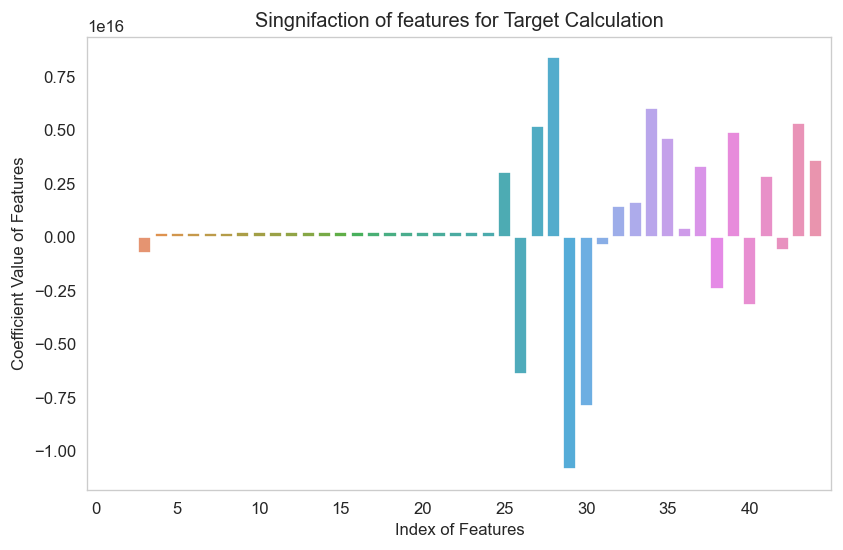

In [26]:
# Now lets visualize the significance of each feature

plt.figure(figsize=(8,5),dpi=120)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.barplot(x = [i for i in range(len(model.coef_))],y = model.coef_)
plt.xticks(np.arange(len(model.coef_)+2,step=5))
plt.ylabel('Coefficient Value of Features')
plt.xlabel('Index of Features')
plt.title('Singnifaction of features for Target Calculation')
plt.show()

In [27]:
# Now we will only consider the features with a significant coefficient. 
final_features = x[x.columns[model.coef_>0.5]]
final_features.head()

,Item_Weight,Item_MRP,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,249.8092,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,5.92,48.2692,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,17.50,141.6180,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,19.20,182.0950,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,8.93,53.8614,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [28]:
x_train,x_test,y_train,y_test = train_test_split(final_features,y,random_state = 3)

In [29]:
# New Model using the final features
model_f = LinearRegression(normalize = True)
model_f.fit(x_train,y_train)

LinearRegression(normalize=True)

In [30]:
train_pred = model_f.predict(x_train)
print('Mean Absolute Error of Training dataset: ', mean_absolute_error(train_pred,y_train))

Mean Absolute Error of Training dataset:  841.8389990613267


In [31]:
test_pred = model_f.predict(x_test)
print('Mean Absolute Error of Training dataset: ', mean_absolute_error(test_pred,y_test))

Mean Absolute Error of Training dataset:  818.5533398404505


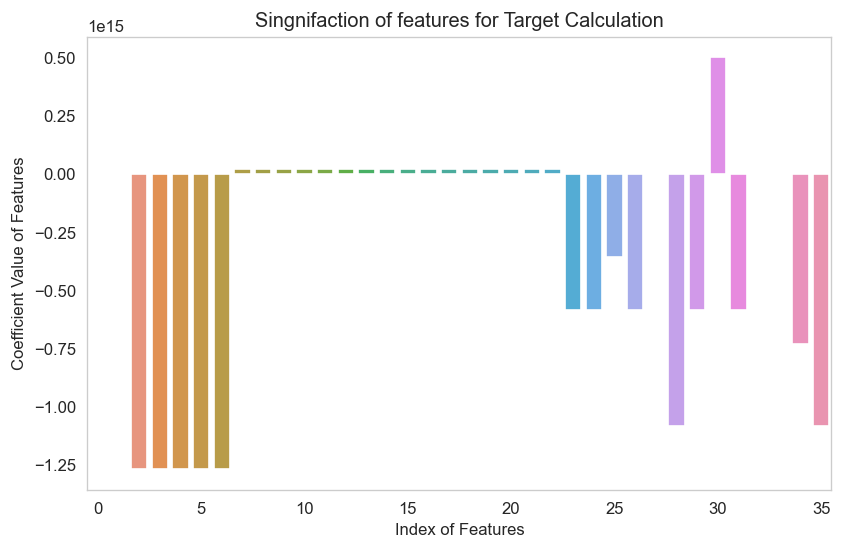

In [32]:
plt.figure(figsize=(8,5),dpi=120)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.barplot(x = [i for i in range(len(model_f.coef_))],y = model_f.coef_)
plt.xticks(np.arange(len(model_f.coef_)+2,step=5))
plt.ylabel('Coefficient Value of Features')
plt.xlabel('Index of Features')
plt.title('Singnifaction of features for Target Calculation')
plt.show()